<a href="https://colab.research.google.com/github/milicak/Data_Analysis_Course/blob/main/02_Normal_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import norm

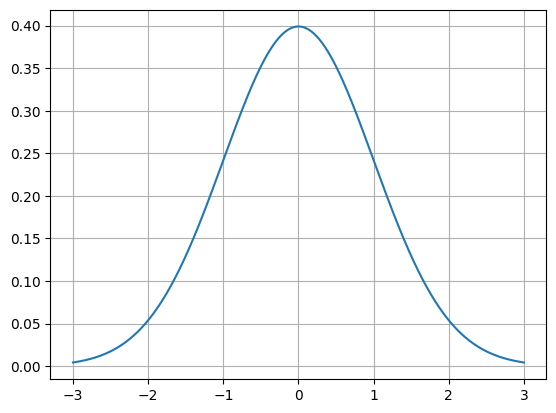

In [4]:
# CALCUATING MEAN AND STANDARD DEVIATION
mu = 0
sigma = 1
x = np.linspace(-3, 3, 1000)
plt.plot(x, norm.pdf(x, mu, sigma))
plt.grid()
# # Assume x = 1
# x=1
# print((1/(np.sqrt(2*np.pi)*sigma))*np.exp(-0.5*((x-0)/sigma)**2))
# plt.plot(x,(1/(np.sqrt(2*np.pi)*sigma))*np.exp(-0.5*((x-0)/sigma)**2),'r-*')
# # Assume x = -1
# x=-1
# print((1/(np.sqrt(2*np.pi)*sigma))*np.exp(-0.5*((x-0)/sigma)**2))
# plt.plot(x,(1/(np.sqrt(2*np.pi)*sigma))*np.exp(-0.5*((x-0)/sigma)**2),'b-*')
# # Assume x = 2
# x=2
# print((1/(np.sqrt(2*np.pi)*sigma))*np.exp(-0.5*((x-0)/sigma)**2))
# plt.plot(x,(1/(np.sqrt(2*np.pi)*sigma))*np.exp(-0.5*((x-0)/sigma)**2),'k-*')
# print(norm.cdf(1, mu, sigma)-norm.cdf(-1, mu, sigma))

Text(0.5, 0, 'x')

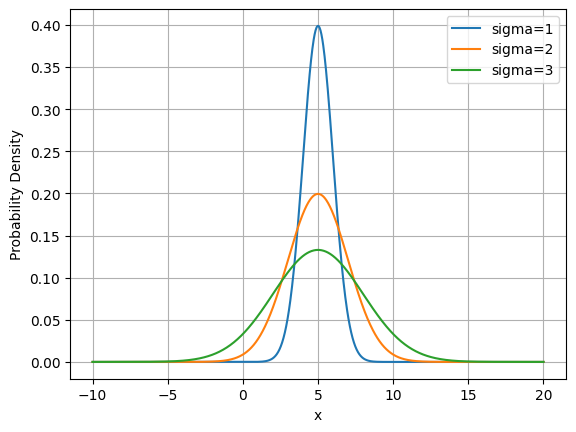

In [5]:
# CALCUATING MEAN AND STANDARD DEVIATION
mu = 5
sigma = 1
x = np.linspace(-10, 20, 1000)
plt.plot(x, norm.pdf(x, mu, sigma),label='sigma=1')
sigma = 2
plt.plot(x, norm.pdf(x, mu, sigma),label='sigma=2')
sigma = 3
plt.plot(x, norm.pdf(x, mu, sigma),label='sigma=3')
plt.legend()
plt.grid()
plt.ylabel('Probability Density')
plt.xlabel('x')

In [6]:
# norm.cdf() calculates the cumulative probability
N = 7
prob_less_than_N= norm.cdf(N, mu, sigma)
print(
    "The probability that a student will score less than", str(N), "is",
    round(prob_less_than_N, 4),
)

The probability that a student will score less than 7 is 0.7475


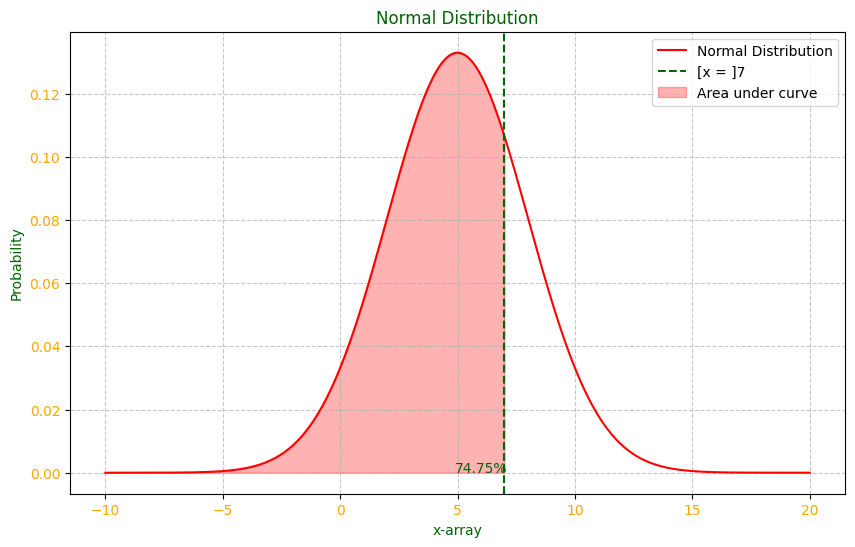

In [7]:
# Calculate the area under the curve up to x = N
area_under_curve = norm.cdf(N, mu, sigma)
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the pdf of the normal distribution
ax.plot(x, norm.pdf(x, mu, sigma), color="red", label="Normal Distribution")
# Draw a red vertical line at x = N
ax.axvline(x=N, color="darkgreen", linestyle="--", label=("[x = ]"+str(N)))

# Create an array of 50 numbers between min of x array and N
x1 = np.linspace(x.min(), N, 50)

# Fill the specified region with red color
ax.fill_between(x1, norm.pdf(x1, mu, sigma), color="red", alpha=0.3, label="Area under curve")

ax.set(xlabel="x-array", ylabel="Probability")

ax.xaxis.label.set_color("darkgreen")
ax.yaxis.label.set_color("darkgreen")

ax.set_title("Normal Distribution", color="darkgreen")

# Add the percentage value on the plot
ax.text(N-1, 0.00015, f"{area_under_curve * 100:.2f}%", color="darkgreen", fontsize=10, ha='center')

ax.legend()

plt.xticks(color='orange')
plt.yticks(color='orange')

# Customize the grid lines
ax.grid(True, linestyle='--', alpha=0.7)


In [8]:
prob_max = 1 - norm.cdf(7.9, mu, sigma)
print(
    "The probability that a value will be more than 7.9 is",
    round(prob_max, 4),
)

The probability that a value will be more than 7.9 is 0.1669


In [11]:
import xarray as xr

In [12]:
df = xr.tutorial.open_dataset("air_temperature")
df

<xarray.Dataset> Size: 31MB
Dimensions:  (time: 2920, lat: 25, lon: 53)
Coordinates:
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
Data variables:
    air      (time, lat, lon) float64 31MB ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

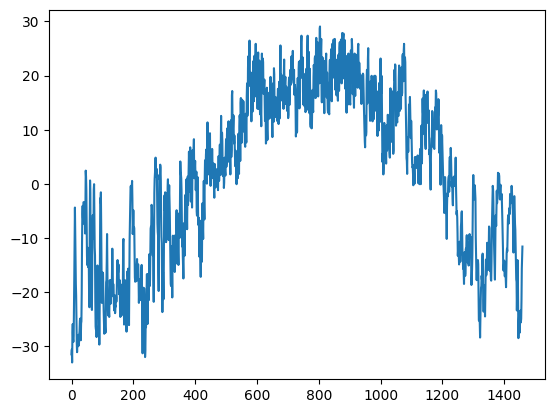

In [13]:
# let's look at the 2014
ds = df.sel(time=slice("2014-01-01", "2014-12-31"))
plt.plot(ds.air[:,10,25]-273.15)

(array([ 3.,  5., 11., 11., 25., 21., 25., 36., 24., 45., 41., 53., 36.,
        35., 31., 29., 35., 31., 27., 43., 39., 53., 58., 48., 43., 37.,
        36., 35., 51., 61., 60., 78., 55., 64., 60., 41., 35., 20., 15.,
         4.]),
 array([-32.95, -31.4 , -29.85, -28.3 , -26.75, -25.2 , -23.65, -22.1 ,
        -20.55, -19.  , -17.45, -15.9 , -14.35, -12.8 , -11.25,  -9.7 ,
         -8.15,  -6.6 ,  -5.05,  -3.5 ,  -1.95,  -0.4 ,   1.15,   2.7 ,
          4.25,   5.8 ,   7.35,   8.9 ,  10.45,  12.  ,  13.55,  15.1 ,
         16.65,  18.2 ,  19.75,  21.3 ,  22.85,  24.4 ,  25.95,  27.5 ,
         29.05]),
 <BarContainer object of 40 artists>)

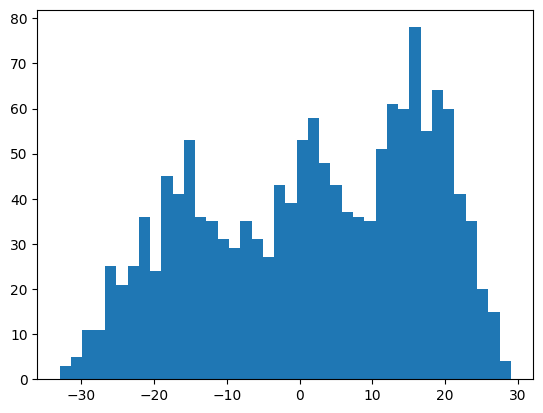

In [16]:
plt.hist(ds.air[:,10,25]-273.15,bins=40)

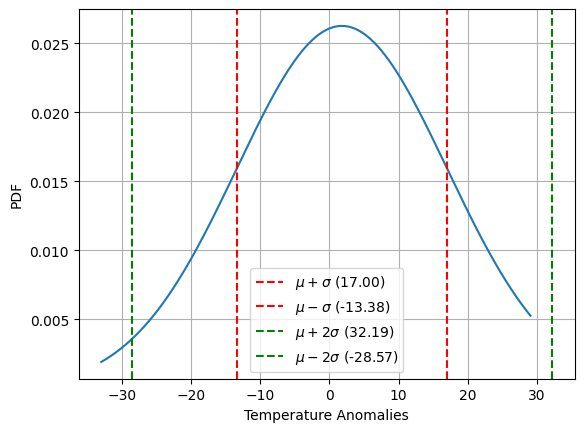

In [27]:
mu = ds.air[:,10,25].mean()-273.15
sigma = ds.air[:,10,25].std()
x = np.linspace(np.copy(ds.air[:,10,25].min()-273.15), np.copy(ds.air[:,10,25].max()-273.15), 1000)
plt.plot(x, norm.pdf(x, mu, sigma))
# Draw a red vertical line at nu+-sigma
plt.axvline(x=mu+sigma, color="red", linestyle="--", label=r'$\mu + \sigma$' + f' ({mu+sigma:.2f})')
plt.axvline(x=mu-sigma, color="red", linestyle="--", label=r'$\mu - \sigma$' + f' ({mu-sigma:.2f})')
# Draw a red vertical line at nu+-2sigma
plt.axvline(x=mu+2*sigma, color="green", linestyle="--", label=r'$\mu + 2\sigma$' + f' ({mu+2*sigma:.2f})')
plt.axvline(x=mu-2*sigma, color="green", linestyle="--", label=r'$\mu - 2\sigma$' + f' ({mu-2*sigma:.2f})')
plt.xlabel('Temperature Anomalies')
plt.ylabel('PDF')
plt.legend()
plt.grid()

In [33]:
# download GISS dataset and install netcdf
!pip install netCDF4
url = 'https://data.giss.nasa.gov/pub/gistemp/gistemp1200_GHCNv4_ERSSTv5.nc.gz'
#The dataset is small enough (23 MB) that it is sufficient to make local copy of the file.
!wget -nc {url}
ds = xr.open_dataset('gistemp1200_GHCNv4_ERSSTv5.nc.gz')
ds

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.2 MB/s eta 0:00:00
--2026-02-15 08:29:32--  https://data.giss.nasa.gov/pub/gistemp/gistemp1200_GHCNv4_ERSSTv5.nc.gz
Resolving data.giss.nasa.gov (data.giss.nasa.gov)... 129.164.141.233, 2001:4d0:2310:151::233
Connecting to data.giss.nasa.gov (data.giss.nasa.gov)|129.164.141.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25742476 (25M) [application/x-gzip]
Saving to: ‘gistemp1200_GHCNv4_ERSSTv5.nc.gz’

gistemp1200_GHCNv4_ 100%[===================>]  24.55M  52.1MB/s    in 0.5s    

2026-02-15 08:29:33 (52.1 MB/s) - ‘gistemp1200_GHCNv4_ERSSTv5.nc.gz’ saved [25742476/25742476]



<xarray.Dataset> Size: 114MB
Dimensions:      (time: 1753, nv: 2, lat: 90, lon: 180)
Coordinates:
  * time         (time) datetime64[ns] 14kB 1880-01-15 1880-02-15 ... 2026-01-15
  * lat          (lat) float32 360B -89.0 -87.0 -85.0 -83.0 ... 85.0 87.0 89.0
  * lon          (lon) float32 720B -179.0 -177.0 -175.0 ... 175.0 177.0 179.0
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] 28kB ...
    tempanomaly  (time, lat, lon) float32 114MB ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2026-02-09 07:49:10 by SBBX_to_nc 2.0 - ILAND=1200,...

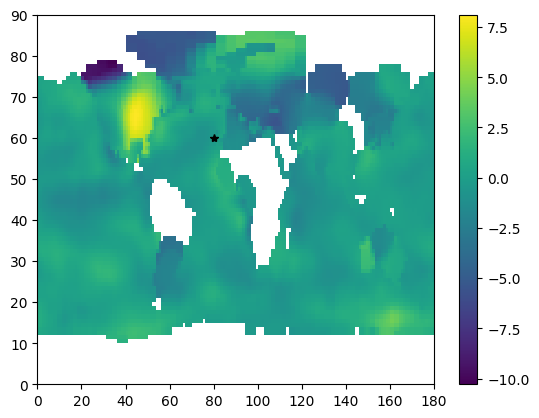

In [44]:
plt.pcolormesh(ds.tempanomaly[0,:,:]);plt.colorbar()
plt.plot(80,60,'k-*')

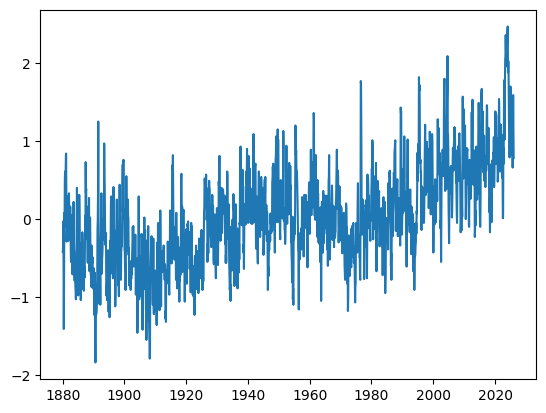

In [45]:
plt.plot(ds.time,ds.tempanomaly[:,60,80])

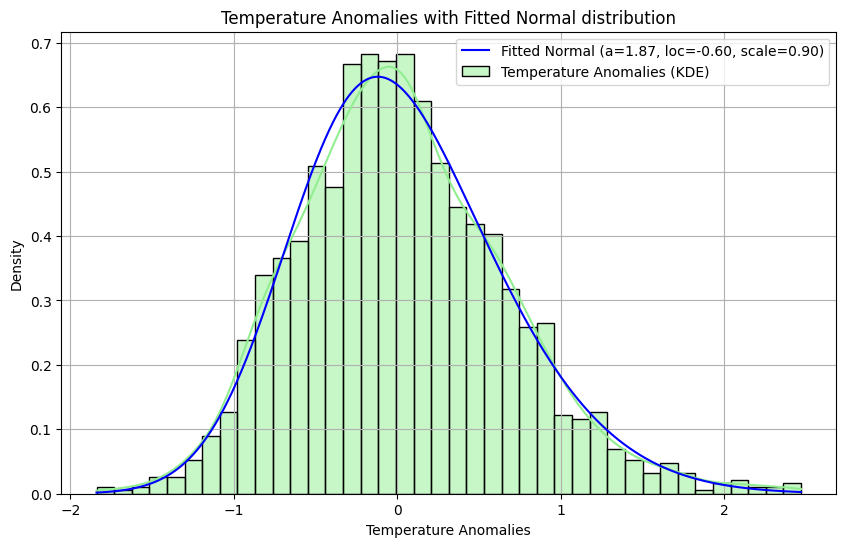

In [43]:
from scipy.stats import skewnorm
import seaborn as sns

Temp_anomaly = ds.tempanomaly[:,60,80].values # Extract values for fitting

# Fit the skew-normal distribution to the data
a_skew, loc_skew, scale_skew = skewnorm.fit(Temp_anomaly)

# Plot the histogram of the data with KDE
plt.figure(figsize=(10, 6))
sns.histplot(Temp_anomaly, bins=40, stat='density', kde=True, color='lightgreen', label='Temperature Anomalies (KDE)')

# Plot the fitted normal distribution PDF
x_skew = np.linspace(Temp_anomaly.min(), Temp_anomaly.max(), 1000)
plt.plot(x_skew, skewnorm.pdf(x_skew, a_skew, loc_skew, scale_skew), 'b-', label=f'Fitted Normal (a={a_skew:.2f}, loc={loc_skew:.2f}, scale={scale_skew:.2f})')

plt.title('Temperature Anomalies with Fitted Normal distribution')
plt.xlabel('Temperature Anomalies')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

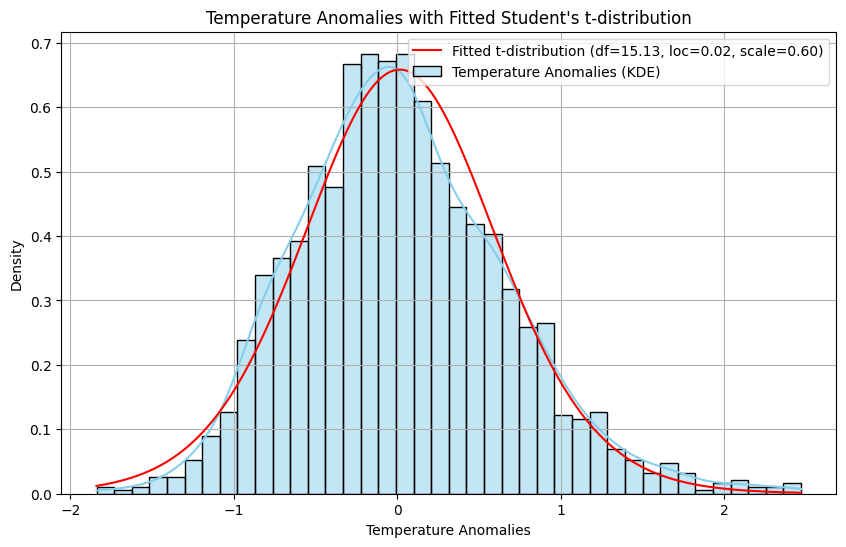

In [40]:
from scipy.stats import t

# Fit the t-distribution to the data
df_t, loc_t, scale_t = t.fit(Temp_anomaly)

# Plot the histogram of the data with KDE
plt.figure(figsize=(10, 6))
sns.histplot(Temp_anomaly, bins=40, stat='density', kde=True, color='skyblue', label='Temperature Anomalies (KDE)')

# Plot the fitted t-distribution PDF
x_t = np.linspace(Temp_anomaly.min(), Temp_anomaly.max(), 1000)
plt.plot(x_t, t.pdf(x_t, df_t, loc_t, scale_t), 'r-', label=f'Fitted t-distribution (df={df_t:.2f}, loc={loc_t:.2f}, scale={scale_t:.2f})')

plt.title('Temperature Anomalies with Fitted Student\'s t-distribution')
plt.xlabel('Temperature Anomalies')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

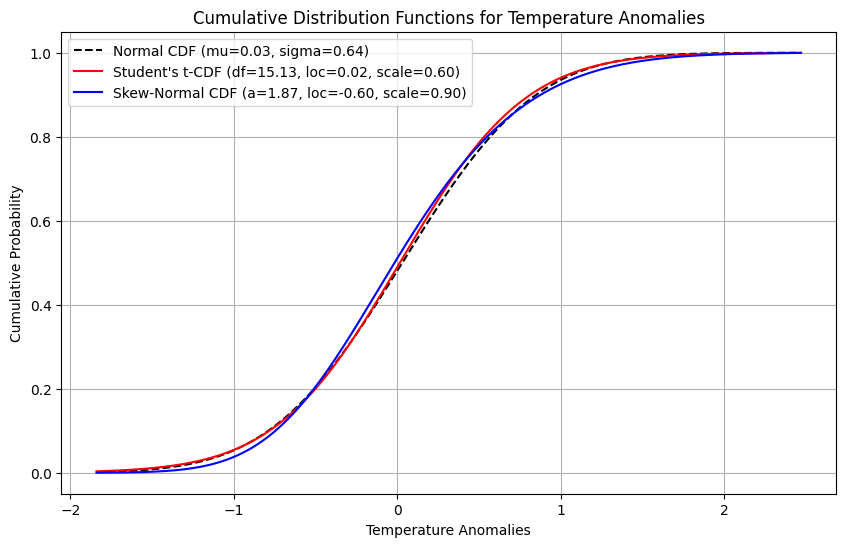

In [42]:
from scipy.stats import norm, t, skewnorm

plt.figure(figsize=(10, 6))

# CDF for Normal Distribution (using previously calculated mu and sigma for air_temperature data)
# Note: This 'mu' and 'sigma' were for 'air_temperature' dataset initially,
# but are now being calculated from the 'tempanomaly' data in the current context.
# I'll re-calculate mu and sigma for the Temp_anomaly data for consistency.
mu_anomaly = Temp_anomaly.mean()
sigma_anomaly = Temp_anomaly.std()
x_normal_cdf = np.linspace(Temp_anomaly.min(), Temp_anomaly.max(), 1000)
plt.plot(x_normal_cdf, norm.cdf(x_normal_cdf, mu_anomaly, sigma_anomaly), 'k--', label=f'Normal CDF (mu={mu_anomaly:.2f}, sigma={sigma_anomaly:.2f})')

# CDF for Student's t-distribution (using df_t, loc_t, scale_t from previous fit)
x_t_cdf = np.linspace(Temp_anomaly.min(), Temp_anomaly.max(), 1000)
plt.plot(x_t_cdf, t.cdf(x_t_cdf, df_t, loc_t, scale_t), 'r-', label=f'Student\'s t-CDF (df={df_t:.2f}, loc={loc_t:.2f}, scale={scale_t:.2f})')

# CDF for Skew-Normal distribution (using a_skew, loc_skew, scale_skew from previous fit)
x_skew_cdf = np.linspace(Temp_anomaly.min(), Temp_anomaly.max(), 1000)
plt.plot(x_skew_cdf, skewnorm.cdf(x_skew_cdf, a_skew, loc_skew, scale_skew), 'b-', label=f'Skew-Normal CDF (a={a_skew:.2f}, loc={loc_skew:.2f}, scale={scale_skew:.2f})')

plt.title('Cumulative Distribution Functions for Temperature Anomalies')
plt.xlabel('Temperature Anomalies')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)
plt.show()

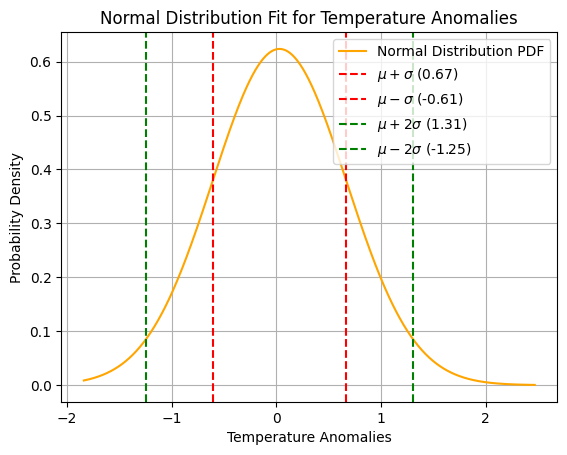

In [48]:
mu = ds.tempanomaly[:,60,80].mean()
sigma = ds.tempanomaly[:,60,80].std()
x = np.linspace(ds.tempanomaly[:,60,80].min().item(), ds.tempanomaly[:,60,80].max().item(), 1000)
plt.plot(x, norm.pdf(x, mu, sigma), color='orange', label='Normal Distribution PDF')
# Draw vertical lines at mu+-sigma
plt.axvline(x=mu+sigma, color="red", linestyle="--", label=r'$\mu + \sigma$' + f' ({mu+sigma:.2f})')
plt.axvline(x=mu-sigma, color="red", linestyle="--", label=r'$\mu - \sigma$' + f' ({mu-sigma:.2f})')
# Draw vertical lines at mu+-2sigma
plt.axvline(x=mu+2*sigma, color="green", linestyle="--", label=r'$\mu + 2\sigma$' + f' ({mu+2*sigma:.2f})')
plt.axvline(x=mu-2*sigma, color="green", linestyle="--", label=r'$\mu - 2\sigma$' + f' ({mu-2*sigma:.2f})')

plt.title('Normal Distribution Fit for Temperature Anomalies')
plt.xlabel('Temperature Anomalies')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

In [49]:
# norm.cdf() calculates the cumulative probability
N = -1.5
prob_less_than_N= norm.cdf(N, mu, sigma)
print(
    "The probability that a student will score less than", str(N), "is",
    round(prob_less_than_N, 4),
)
# Calculate the area under the curve up to x = N
area_under_curve = norm.cdf(N, mu, sigma)

The probability that a student will score less than -1.5 is 0.0084


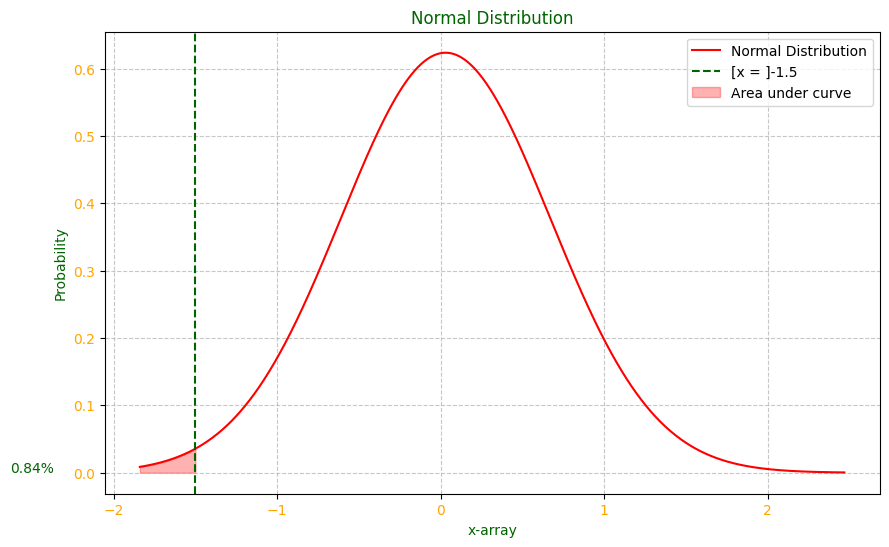

In [50]:
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the pdf of the normal distribution
ax.plot(x, norm.pdf(x, mu, sigma), color="red", label="Normal Distribution")
# Draw a red vertical line at x = N
ax.axvline(x=N, color="darkgreen", linestyle="--", label=("[x = ]"+str(N)))

# Create an array of 50 numbers between min of x array and N
x1 = np.linspace(x.min(), N, 50)

# Fill the specified region with red color
ax.fill_between(x1, norm.pdf(x1, mu, sigma), color="red", alpha=0.3, label="Area under curve")

ax.set(xlabel="x-array", ylabel="Probability")

ax.xaxis.label.set_color("darkgreen")
ax.yaxis.label.set_color("darkgreen")

ax.set_title("Normal Distribution", color="darkgreen")

# Add the percentage value on the plot
ax.text(N-1, 0.00015, f"{area_under_curve * 100:.2f}%", color="darkgreen", fontsize=10, ha='center')

ax.legend()

plt.xticks(color='orange')
plt.yticks(color='orange')

# Customize the grid lines
ax.grid(True, linestyle='--', alpha=0.7)

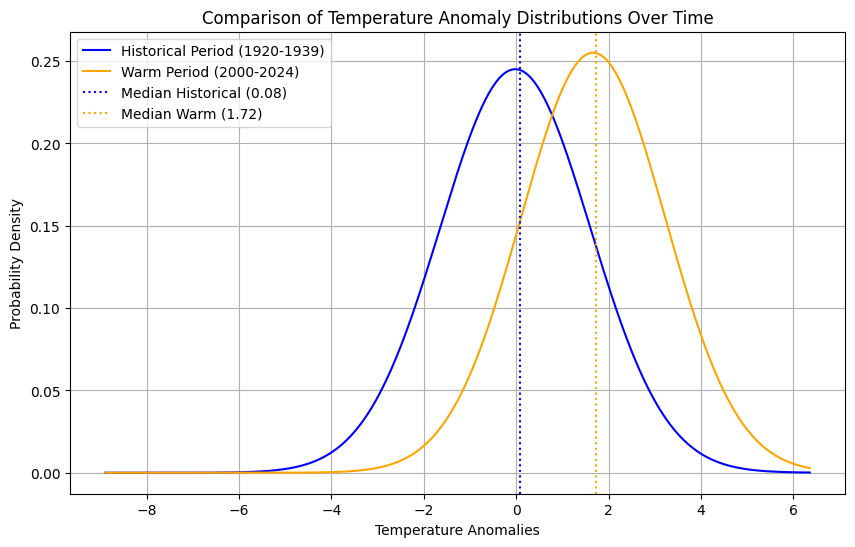

In [55]:
Thist = ds.tempanomaly[:,70,100].sel(time=slice('1920','1939'))
Twarm = ds.tempanomaly[:,70,100].sel(time=slice('2000','2024'))

mu1 = Thist.mean()
sigma1 = Thist.std()
mu2 = Twarm.mean()
sigma2 = Twarm.std()

plt.figure(figsize=(10, 6))

# Calculate a standard x-range covering both periods
min_overall = min(Thist.min().item(), Twarm.min().item())
max_overall = max(Thist.max().item(), Twarm.max().item())
x_standard = np.linspace(min_overall, max_overall, 1000)

plt.plot(x_standard, norm.pdf(x_standard, mu1, sigma1), color='blue', label='Historical Period (1920-1939)')
plt.plot(x_standard, norm.pdf(x_standard, mu2, sigma2), color='orange', label='Warm Period (2000-2024)')

# Add median lines
median_thist = Thist.median().item()
median_twarm = Twarm.median().item()
plt.axvline(x=median_thist, color='blue', linestyle=':', label=f'Median Historical ({median_thist:.2f})')
plt.axvline(x=median_twarm, color='orange', linestyle=':', label=f'Median Warm ({median_twarm:.2f})')

plt.title('Comparison of Temperature Anomaly Distributions Over Time')
plt.xlabel('Temperature Anomalies')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

### Cumulative Distribution Functions of Temperature Anomalies for Different Periods

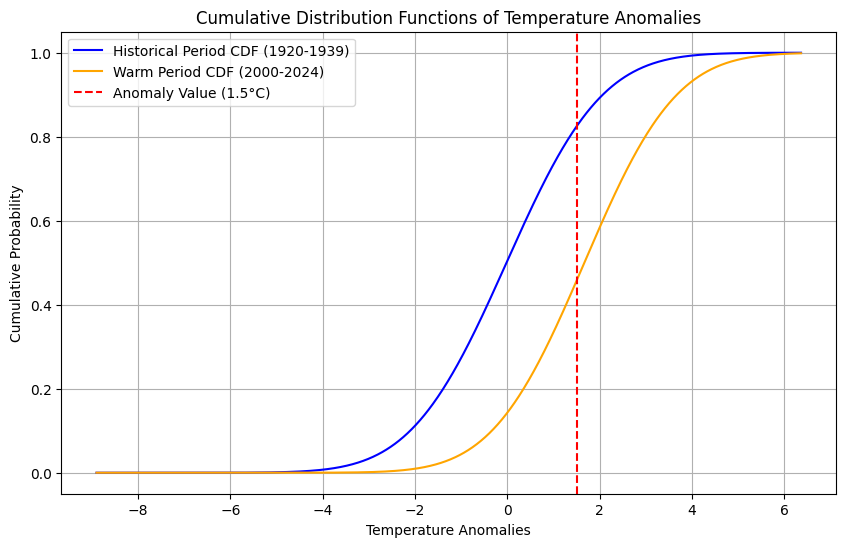

In [59]:
plt.figure(figsize=(10, 6))

# Calculate a standard x-range covering both periods
min_overall = min(Thist.min().item(), Twarm.min().item())
max_overall = max(Thist.max().item(), Twarm.max().item())
x_standard = np.linspace(min_overall, max_overall, 1000)

# CDF for Historical Period
cdf_thist = norm.cdf(x_standard, mu1, sigma1)
plt.plot(x_standard, cdf_thist, color='blue', label='Historical Period CDF (1920-1939)')

# CDF for Warm Period
cdf_twarm = norm.cdf(x_standard, mu2, sigma2)
plt.plot(x_standard, cdf_twarm, color='orange', label='Warm Period CDF (2000-2024)')

# Add vertical line at 1.5 degrees anomaly
anomaly_value = 1.5 # Using the previously defined anomaly value
plt.axvline(x=anomaly_value, color='red', linestyle='--', label=f'Anomaly Value ({anomaly_value}°C)')

plt.title('Cumulative Distribution Functions of Temperature Anomalies')
plt.xlabel('Temperature Anomalies')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
anomaly_value = 1.5

# Calculate the CDF for the historical period at the anomaly value
prob_thist_at_anomaly = norm.cdf(anomaly_value, mu1, sigma1)

# Calculate the CDF for the warm period at the anomaly value
prob_twarm_at_anomaly = norm.cdf(anomaly_value, mu2, sigma2)

# Calculate the difference in probabilities
probability_difference = prob_twarm_at_anomaly - prob_thist_at_anomaly

print(f"For an anomaly value of {anomaly_value}°C:")
print(f"  Cumulative probability for Historical Period (1920-1939): {prob_thist_at_anomaly:.4f}")
print(f"  Cumulative probability for Warm Period (2000-2024): {prob_twarm_at_anomaly:.4f}")
print(f"  Difference in cumulative probability (Warm - Historical): {probability_difference:.4f}")

if probability_difference > 0:
    print(f"This means there is a {probability_difference*100:.2f}% higher chance of observing temperatures up to {anomaly_value}°C in the warm period compared to the historical period.")
elif probability_difference < 0:
    print(f"This means there is a {abs(probability_difference)*100:.2f}% lower chance of observing temperatures up to {anomaly_value}°C in the warm period compared to the historical period.")
else:
    print("There is no significant difference in cumulative probability at this anomaly value.")

For an anomaly value of 1.5°C:
  Cumulative probability for Historical Period (1920-1939): 0.8249
  Cumulative probability for Warm Period (2000-2024): 0.4575
  Difference in cumulative probability (Warm - Historical): -0.3674
This means there is a 36.74% lower chance of observing temperatures up to 1.5°C in the warm period compared to the historical period.


In [54]:
median_thist = Thist.median().item()
median_twarm = Twarm.median().item()

print(f"Median temperature anomaly for the historical period (1920-1939): {median_thist:.2f}")
print(f"Median temperature anomaly for the warm period (2000-2024): {median_twarm:.2f}")

Median temperature anomaly for the historical period (1920-1939): 0.08
Median temperature anomaly for the warm period (2000-2024): 1.72
